In [ ]:
!pip3 install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Setup for headless Chrome
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Initialize the driver
driver = webdriver.Chrome(options=options)

# Navigate to the webpage
url = "https://www.bbc.com/weather/293397"
driver.get(url)

# Wait for the necessary elements to be loaded
wait = WebDriverWait(driver, 10)
wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'wr-day-temperature')))
wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'wr-day__title')))

# Extract HTML content after it's loaded
html_content = driver.page_source

# Use BeautifulSoup to parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find temperature elements
temperature_elements = driver.find_elements(By.CLASS_NAME, 'wr-day-temperature')

# Extract text from each temperature element
for element in temperature_elements:
    temperature_text = element.text
    print(temperature_text)

# Quit the driver
driver.quit()


High
20°
Low
10°
High
21°
Low
11°
High
19°
Low
14°
High
18°
Low
14°
High
18°
Low
11°
High
20°
Low
12°
High
18°
Low
13°
High
16°
Low
10°
High
18°
Low
9°
High
19°
Low
11°
High
20°
Low
10°
High
20°
Low
10°
High
20°
Low
11°
High
20°
Low
10°


In [ ]:
import pandas as pd

# Sample temperature data
temperature_text = '''High
20°
Low
10°
High
21°
Low
11°
High
19°
Low
14°
High
18°
Low
14°
High
18°
Low
11°
High
20°
Low
12°
High
18°
Low
13°
High
16°
Low
10°
High
18°
Low
9°
High
19°
Low
11°
High
20°
Low
10°
High
20°
Low
10°
High
20°
Low
11°
High
20°
Low
10°'''

lines = temperature_text.split('\n')

days = lines[::2]
temps = [int(temp[:-1]) for temp in lines[1::2]]

data = {'Temperature': temps}
df = pd.DataFrame(data, columns=['Temperature'])

df['Type'] = ['High' if i % 2 == 0 else 'Low' for i in range(len(temps))]

avg_high_temp = df[df['Type'] == 'High']['Temperature'].mean()
avg_low_temp = df[df['Type'] == 'Low']['Temperature'].mean()

max_high_temp = df[df['Type'] == 'High']['Temperature'].max()
max_low_temp = df[df['Type'] == 'Low']['Temperature'].max()

min_high_temp = df[df['Type'] == 'High']['Temperature'].min()
min_low_temp = df[df['Type'] == 'Low']['Temperature'].min()

print(f"Average High Temperature: {avg_high_temp}")
print(f"Average Low Temperature: {avg_low_temp}")
print(f"Maximum High Temperature: {max_high_temp}")
print(f"Maximum Low Temperature: {max_low_temp}")
print(f"Minimum High Temperature: {min_high_temp}")
print(f"Minimum Low Temperature: {min_low_temp}")


Average High Temperature: 19.071428571428573
Average Low Temperature: 11.142857142857142
Maximum High Temperature: 21
Maximum Low Temperature: 14
Minimum High Temperature: 16
Minimum Low Temperature: 9


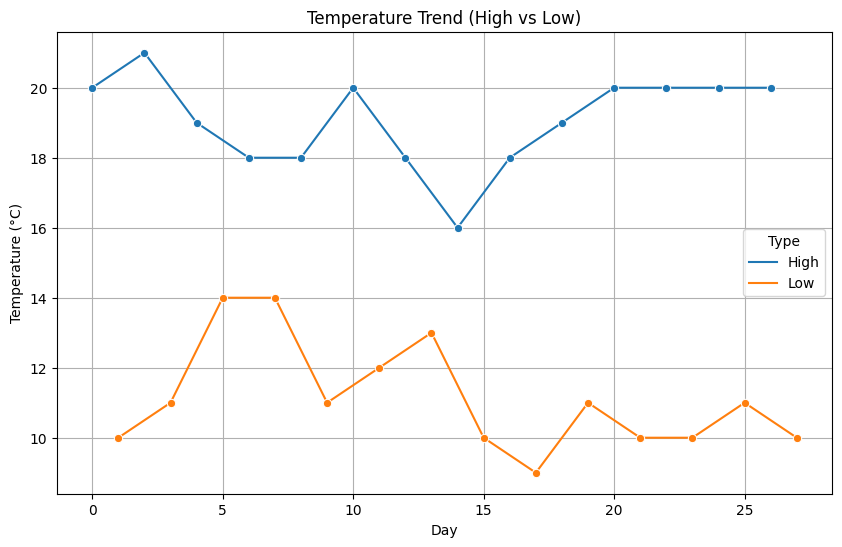

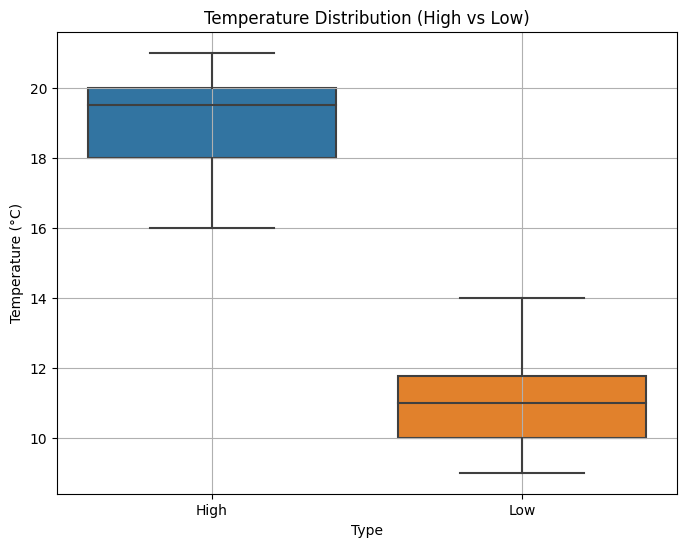

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Temperature', hue='Type', marker='o')
plt.title('Temperature Trend (High vs Low)')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.legend(title='Type')
plt.grid(True)
plt.show()

# Plotting 'High' and 'Low' temperatures using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type', y='Temperature')
plt.title('Temperature Distribution (High vs Low)')
plt.xlabel('Type')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()